<a href="https://colab.research.google.com/github/saurabhsuman2406/Deep-Learning-Experiments/blob/master/A_study_on_existing_Indian_Agriculture_Information_System_at_Google_Play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 51kB 6.1MB/s 


In [4]:
!pip install -qq -U watermark

In [5]:
%reload_ext watermark
%watermark -v -p pandas,matplotlib,seaborn,google_play_scraper

Python implementation: CPython
Python version       : 3.7.10
IPython version      : 5.5.0

pandas             : 1.1.5
matplotlib         : 3.2.2
seaborn            : 0.11.1
google_play_scraper: 0.2.1



In [16]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [43]:
app_packages = [
  'com.globalagricentral',
  'com.criyagen',
  'com.IFFCOKisan',
  'com.mcc.agrilearner',
  'com.peat.GartenBank',
  'nithra.tamil.vivasayam.agriculture.market',
  'com.ulink.agrostar',
  'com.iqra.agromedix',
  'com.BigHaat',
  'com.kisanportalapp',
  'com.mandibhav.app',
  'coop.nddb.pashuposhan',
  'com.criyagen',
  'net.mobile.icar.kisaan'
  
]


In [44]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='in')
  del info['comments']
  app_infos.append(info)

100%|██████████| 14/14 [00:02<00:00,  5.26it/s]


In [45]:
def print_json(json_object):
  json_str = json.dumps(
    json_object, 
    indent=2, 
    sort_keys=True, 
    default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [46]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "4.4",
  "androidVersionText": "4.4 and up",
  "appId": "com.globalagricentral",
  "containsAds": false,
  "contentRating": "Rated for 3+",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "AgriCentral is a technology based agriculture app specially made for Indian farmers to help them make critical decisions in their farming business to increase profitability. It harnesses state of the art technologies like Global positioning, satellite imagery, big data analytics, machine learning and image analytics to usher the farmers into the era of digital farming.\r\n\r\nAbsolutely free of cost, this new and enhanced app has the following key features:\r\n\r\n\u2022 Farm Voice: It\u2019s a place to interact with progressive farmers all across the country and Agri experts for resolution of your queries. You can ask questions about your crop, learn about new farming techniques, showcase your success stories and discuss on any t

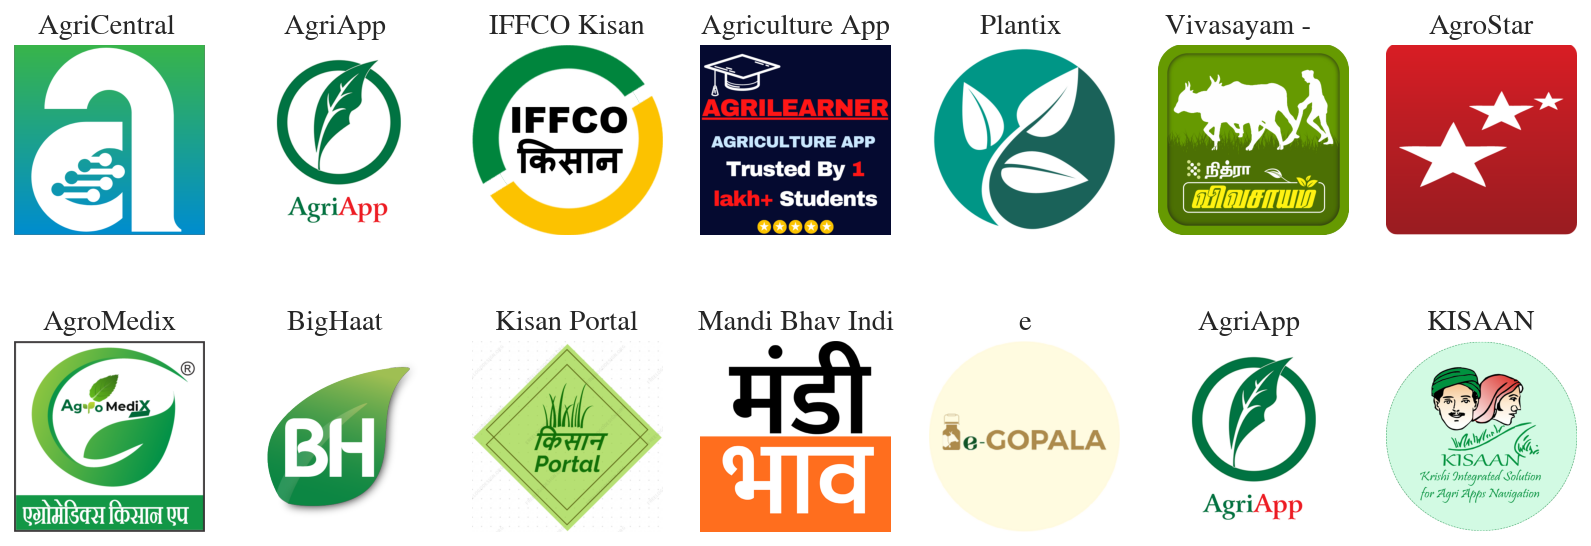

In [66]:
import warnings
import matplotlib
import matplotlib.pyplot as plt
# Customize matplotlib
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'stixgeneral',
        'mathtext.fontset': 'stix',
    }
)

def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:15]

fig, axs = plt.subplots(2, len(app_infos) // 2, figsize=(14, 5))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')


#ignore by message
#warnings.filterwarnings("ignore", message="Glyph 2997 missing from current font")
warnings.filterwarnings("ignore")

In [68]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [69]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 14/14 [00:38<00:00,  2.74s/it]


In [70]:
print_json(app_reviews[0])

{
  "appId": "com.globalagricentral",
  "at": "2021-05-15 08:19:44",
  "content": "bug problem not work proper lag ho raha h app",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "4.0.2",
  "reviewId": "gp:AOqpTOFmfVILLotCxGfYMBeSPyxEnsF5Ct7ZQGieSWBF6Qu2bm0AZ_0cqJBzzqfqSjyMX9e3JQaFMKtU-5Y9dJM",
  "score": 1,
  "sortOrder": "newest",
  "thumbsUpCount": 0,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14Ghlw8jQz2kNfdzCHszEInp9P3LeyESlV0DV_NnL_w",
  "userName": "hukam c"
}

